# 3 - Beyond Straight Lines

--- 

## Simple Linear Regression

So far we have seen how to perform simple linear regression in Python, that is, a situation where we have one set independant variables

$$
x\text{-data} \, = \, [x_1, x_2, x_3, ... , x_N]
$$

an associated set of dependant variables

$$
y\text{-data} \, = \, [y_1, y_2, y_3, ... , y_N]
$$

and we propose a simple linear fit. This means we guess that the data is well-approximated by a line of the form

$$
f(x) = mx + c
$$

![](images/SLR.png)

Notice we have only two variables to find: the gradient, $m$, and the intercept $c$. 

## More Complicated Data

In reality, we are likely to encounter data which has a more complex relationship. For this reason, we need to start developing tools that are able to handle this additional complexity. For example, that happens if we observe data that looks like this?

![](images/poly-reg.png)

Clearly a straight line will not be sufficient to describe data of this form. In this notebook we will begin to think about more general functions that simply staight lines. In particular, we will look at *polynomials*. 

## What is a polynomial?

A polynomial is a function of $x$ where we see things like $x^2$, $x^3$ ... A general polynomial contains an unlimited number of terms where we see $x$ *raised to a power*. Here are some examples of valid polynomial functions

$$
f(x) = 1 + x + x^2 
$$

$$
f(x) = 2 + x - 2x^2 
$$

$$
f(x) = -5 + 3x + x^2 + 5x^3
$$

$$
f(x) = -10 + \frac{x}{2} - 8x^2 + 5x^3 + \frac{x^4}{10}
$$

Polynomials are generally *curved* - they are not straight lines

## A General Quadratic Polynomial 

Let's assume our data has an underlying relationship that is of a *quadratic* form. This means we will consider as our model functions that include terms up to $x^2$. A general quadratic polynomial will have the form 

$$
f(x) = a + bx + cx^2
$$

## Exercise 1 

Use the interactive graph below to explore what happens to the quadratic polynomial curve when you adjust the coefficients $a, b$ and $c$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
np.set_printoptions(precision=4, linewidth=500, threshold=500, suppress=True)

In [3]:
%matplotlib notebook

In [4]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


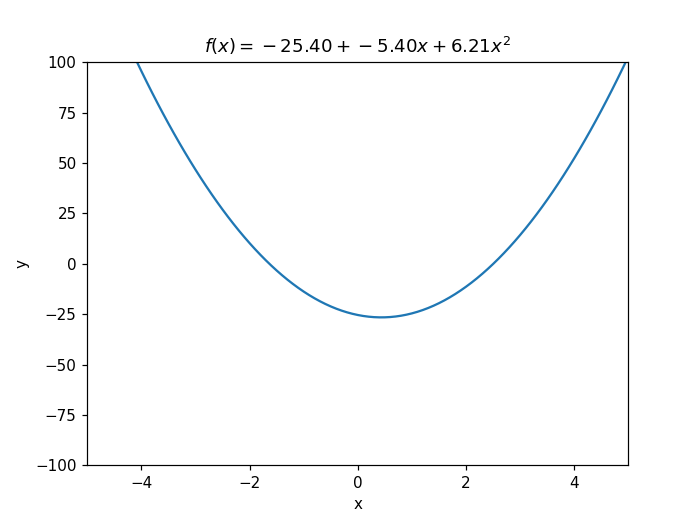

interactive(children=(FloatSlider(value=-20.0, description='a', min=-100.0), Output()), _dom_classes=('widget-…

interactive(children=(FloatSlider(value=-9.0, description='b', max=50.0, min=-50.0), Output()), _dom_classes=(…

interactive(children=(FloatSlider(value=1.5, description='c', max=10.0, min=-10.0, step=0.01), Output()), _dom…

In [11]:
from scripts.regression3 import make_graph_1

make_graph_1()

### Fitting a Quadratic Polynomial

For a given set of data, our task is to find the values of $a, b$ and $c$ that *fit that data the best*. 

Let's say we have settled on some values for $a, b$ and $c$. In that case, our prediction for the value of the curve at our first input point $x_1$ will be 

$$
f(x_1) = a + bx_1 + cx_1^2
$$

however, we have observed a real value of $y_1$. The square difference will be 

$$
\begin{align}
(\text{observed value} - \text{predicted value})^2 &= \big(y_1 - f(x_1)\big)^2 \\
&= \big( y_1 - (a + bx_1 + cx_1^2) \, \big) ^2
\end{align}
$$

Like before, the task of finding the best values for our parameters can be rephrased as minimising the total squared difference between our prediction and our observation across *all* our observations

$$
\begin{align}
\text{Total Error} &= \sum_{i=1}^{N} \big(y_i - f(x_i)\big)^2\\
&= \sum_{i=1}^{N} \big(y_i - (a + bx_i + cx_i^2) \big)^2
\end{align}
$$

## Exercise 2 - Creating some artificial data

For the purpose of this notebook we will create some artificial data, as before. This time you will create it yourself. If you need a reminder on how any of the numpy or matplotlib functions work, create a new cell by clicking to the left of an existing cell and hitting `a` or `b`, then type the function you need help with followed by a question mark. E.g.

```python
plt.scatter?
```

### Exercise 2.1 

Create an array called `x_data` which has evenly spaced numbers using the function `np.linspace`. Choose some sensible numbers as the start and end point, as well as the number of steps to take by assigning the variables `x_start`, `x_end` and `n_observations`. Print out your newly created array and examine it to make sure everything looks ok. 

In [ ]:
# YOUR CODE HERE

x_start = 
x_end = 
n_observations =

x_data =      

### Exercise 2.3 

Set some values for $a, b$ and $c$ between -10 and 10. These will be used to create a variable called `y_true`, which will represent the 'true' underlying y-values, before any noise has been added. Print out this value and check it seems alright. 

In [ ]:
# YOUR CODE HERE

a = 
b = 
c = 
y_true = a + b * x_data + c * x_data ** 2

### Exercise 2.4 

Using the numpy function `np.random.normal`, create a new array called `noise`. Remember, this takes three arguments. The first is the mean (which will be 0), the second is the standard deviation (the width of the random distribution, which we often call $\sigma$ [sigma]) and the final argument is the length of the array. Print out your noise array to make sure it is the right length. Then create a new variable called `y_data` by adding together `y_true` and `noise`. 

In [ ]:
# YOUR CODE HERE

sigma = 
noise = 
y_data = 

### Exercise 2.5 

Create a scatter plot to examine the data you have created using `plt.scatter`. If needs be, go back and edit the variables you have set until you have some fake data you are happy with. 

HINT: if you make the standard deviation of the noise too high, you won't be able to see the relationship. 

In [ ]:
# YOUR CODE HERE


## Solving the regression problem 

### Linear Algebra

Before we solve the regression problem with code, we are going to take a brief look at something called **linear algebra**. Linear algrbra is a topic in maths that will help us to talk efficiently about data. There are two important concepts to understand: **vectors** and **matrices**. 

### Vectors

A vector can be thought of as a 1D list of numbers. In maths, we usually write vectors as a column like this 

$$
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ \vdots \\ v_N\end{bmatrix}
$$

If two vectors have the same length, we can add them together like this 

$$
\mathbf{u} + \mathbf{v} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ \vdots \\ u_N\end{bmatrix} + \begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ \vdots \\ v_N\end{bmatrix} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \\ u_3 + v_3 \\ \vdots \\ u_N + v_N\end{bmatrix}
$$

or subtract them like this

$$
\mathbf{u} - \mathbf{v} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ \vdots \\ u_N\end{bmatrix} - \begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ \vdots \\ v_N\end{bmatrix} = \begin{bmatrix} u_1 - v_1 \\ u_2 - v_2 \\ u_3 - v_3 \\ \vdots \\ u_N - v_N\end{bmatrix}
$$

We can also flip a vector, to make it into a row vector, by adding a $\top$, for *transpose*. 

$$
\mathbf{v}^{\top} = \begin{bmatrix} v_1, \; v_2, \;  v_3, \; ... , \; v_N\end{bmatrix}
$$

When you see a vector transposed, times a regular vector, the meaning is that we multiply each corresponding pair of elements and add them all together

$$
\begin{align}
\mathbf{u}^{\top}\mathbf{v} &=  \begin{bmatrix} u_1, \; u_2, \;  u_3, \; ... , \; u_N\end{bmatrix} \;\, \times \;\, \begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ \vdots \\ v_N\end{bmatrix} \\[0.5cm]
&= u_1 v_1 + u_2 v_2 + u_3 v_3 + ... + u_N v_N 
\end{align}
$$

This is often referred to as the *dot product*. 

#### Example

$$
\mathbf{u} = \begin{bmatrix} 1 \\ 2 \\  3 \end{bmatrix}, \quad \mathbf{v} = \begin{bmatrix} 4 \\ 5 \\  6 \end{bmatrix}\\[2cm]
$$

$$
\mathbf{u} + \mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix} 5 \\ 7 \\  9 \end{bmatrix} \\[2cm]
\mathbf{u} - \mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} - \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix} -3 \\ -3 \\  -3 \end{bmatrix}\\[2cm]
\mathbf{u}^{\top}\mathbf{v} = (1 \times 4) + (2 \times 5) + (3 \times 6) = 32
$$

### Matrices

A matrix is a *rectangle* of numbers. You can think of a matrix as being multiple row vectors stacked on top of each other

$$
A = \begin{bmatrix}
\rule[.5ex]{4.5ex}{0.5pt} \; \mathbf{a}_1^{\top} \; \rule[.5ex]{4.5ex}{0.5pt} \\
\rule[.5ex]{4.5ex}{0.5pt} \; \mathbf{a}_2^{\top} \; \rule[.5ex]{4.5ex}{0.5pt} \\
\rule[.5ex]{4.5ex}{0.5pt} \; \mathbf{a}_3^{\top} \; \rule[.5ex]{4.5ex}{0.5pt} \\
 \vdots \\ 
 \rule[.5ex]{4.5ex}{0.5pt} \; \mathbf{a}_M^{\top} \; \rule[.5ex]{4.5ex}{0.5pt}
 \end{bmatrix}
$$

If each of these row vectors has length $N$, and we stack $M$ vectors on top of each other, then the matrix is a rectangle of numbers with height $M$ and width $N$. 

Matrices *multiply vectors*. A matrix multiplied by a vector gives us a new vector. Each element of this new vector is the dot product between each row of the matrix, and the original vector. 

$$
A \mathbf{v} = \begin{bmatrix}
\rule[.5ex]{4.5ex}{0.5pt} \; \mathbf{a}_1^{\top} \; \rule[.5ex]{4.5ex}{0.5pt} \\
\rule[.5ex]{4.5ex}{0.5pt} \; \mathbf{a}_2^{\top} \; \rule[.5ex]{4.5ex}{0.5pt} \\
\rule[.5ex]{4.5ex}{0.5pt} \; \mathbf{a}_3^{\top} \; \rule[.5ex]{4.5ex}{0.5pt} \\
 \vdots \\ 
 \rule[.5ex]{4.5ex}{0.5pt} \; \mathbf{a}_M^{\top} \; \rule[.5ex]{4.5ex}{0.5pt}
 \end{bmatrix} \; \begin{bmatrix}\rule[-1ex]{0.5pt}{3.5ex} \\  \mathbf{v} \\ \rule[-1ex]{0.5pt}{3.5ex} \end{bmatrix} 
 = \begin{bmatrix} \mathbf{a}_1^{\top} \mathbf{v} \\ \mathbf{a}_2^{\top} \mathbf{v} \\ \mathbf{a}_3^{\top} \mathbf{v} \\ \vdots \\ \mathbf{a}_M^{\top} \mathbf{v} \end{bmatrix}
$$

#### Example

$$
A = \begin{bmatrix}
1 & 2 & 3 \\
2 & 3 & 4 \\
3 & 4 & 5 \\
4 & 5 & 6 \\
\end{bmatrix} \quad 
\mathbf{v} =  \begin{bmatrix}
3 \\
2 \\
1 \\
\end{bmatrix} \\[2cm]
A\mathbf{v} = \begin{bmatrix}
(3 \times 1) + (2 \times 2) + (1 \times 3) \\
(3 \times 2) + (2 \times 3) + (1 \times 4) \\
(3 \times 3) + (2 \times 4) + (1 \times 5) \\
(3 \times 4) + (2 \times 5) + (1 \times 6) \\
\end{bmatrix} = 
\begin{bmatrix}
3 + 4 + 3\\
6 + 6 + 4 \\
9 + 8 + 5 \\
12 + 10 + 6 \\
\end{bmatrix}
 = 
\begin{bmatrix}
10 \\
16 \\
23 \\
28 \\
\end{bmatrix}
$$

## Framing the regression problem with Linear Algebra

Consider a matrix $X$, created out of our collected data, which has the following form 

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
1 & x_3 & x_3^2 \\
 \vdots & \vdots & \vdots\\ 
1 & x_N & x_N^2
\end{bmatrix}
$$

Now consider a vector made up of our parameters $a, b$ and $c$

$$
\mathbf{w} = \begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
$$

What happens when we multiply $\mathbf{w}$ by $X$?

$$
\begin{align}
X\mathbf{w} &= \begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
1 & x_3 & x_3^2 \\
 \vdots & \vdots & \vdots\\ 
1 & x_N & x_N^2
\end{bmatrix} \; \begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix} \\[0.5cm]
&=  \begin{bmatrix}
a + bx_1 + cx_1^2\\
a + bx_2 + cx_2^2 \\
a + bx_3 + cx_3^2 \\
\vdots \\
a + bx_N+ cx_N^2
\end{bmatrix}
\end{align}
$$

For a given $a, b$ and $c$, $X\mathbf{w}$ represents a vector of our *predictions*. 

Consider a vector $\mathbf{y}$ containing our observations

$$
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_N
\end{bmatrix}
$$

The difference between our observations and our predictions is 

$$
\begin{align}
\mathbf{y} - X\mathbf{w} &= 
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_N
\end{bmatrix} - 
\begin{bmatrix}
a + bx_1 + cx_1^2\\
a + bx_2 + cx_2^2 \\
a + bx_3 + cx_3^2 \\
\vdots \\
a + bx_N+ cx_N^2
\end{bmatrix} \\[0.5cm]
&= \begin{bmatrix}
y_1 - (a + bx_1 + cx_1^2) \\
y_2 - (a + bx_2 + cx_2^2) \\
y_3 - (a + bx_3 + cx_3^2) \\
\vdots \\
y_N - (a + bx_N+ cx_N^2)
\end{bmatrix}
\end{align}
$$

And our total error is 

$$
(\mathbf{y} - X\mathbf{w})^{\top}(\mathbf{y} - X\mathbf{w})
$$

## Exercise 3 - Making $X$

In order to solve the regression problem, we need to construct the matrix $X$. 

### Exercise 3.1 

We will start with a blank matrix filled with zeros. Using the function `np.zeros`, create a blank matrix called `X` with a height of `n_observations` and a width of 3. 

In [ ]:
# YOUR CODE HERE 

X = 
print(X)

### Exercise 3.2 

Populate the first column of `X` with all ones

In [ ]:
# YOUR CODE HERE

print(X)

### Exercise 3.3 
Populate the second column of `X` with the array `x_data`

In [ ]:
# YOUR CODE HERE

print(X)

### Exercise 3.4 
Populate the third column of `X` with the array `x_data` squared

In [ ]:
# YOUR CODE HERE

print(X)

## Exercise 4 - Solving the regression problem

As before, in order to solve the linear regression problem we will use the numpy function `np.linalg.lstsq`. This function takes two arguments. The first is our data matrix `X`. The second is the observation vector `y_data`. This function will return us the vector $\mathbf{w}$ that minimises 

$$
(\mathbf{y} - X\mathbf{w})^{\top}(\mathbf{y} - X\mathbf{w})
$$

### Exercise 4.1 

Call `np.linalg.lstsq` on `X` and `y_data`. See the results

In [ ]:
# YOUR CODE HERE



### Exercise 4.2 

Create a new variable called `w_fit` and assign the first element of the previous return value to it. Print out the best values for $a, b$ and $c$. How close are they to the values you set before?

In [ ]:
# YOUR CODE HERE


## Exercise 4.3 

We are now going to plot the fitted function alongside our observed data. In order to do this, let's create a new variable called `x_space` using `np.linspace`. This will be an x-array beginning at `x_start` and ending at `x_end`, but with many intermediate points. 

In [ ]:
# YOUR CODE HERE


## Exercise 4.4 

Using this array, and the coefficients inside `w_fit`, create a variable called `y_fit` which will mark our fitted y-function.  Hint: 

$$
y = a + bx + cx^2
$$

In [ ]:
# YOUR CODE HERE

## Exercise 4.5 

Create a new matplotlib figure. On this figure, scatter `x_data` and `y_data` as in exercise 2.5, and then plot `x_space` and `y_fit` as a line.   

In [ ]:
# YOUR CODE HERE

## Exercise 5 - Solving a cubic polynomial problem 

Now we will repeat the process, but this time we will propose a *cubic* model. This means we must construct a matrix $X$ that has an extra column, with the cube of our data inputs. 

### Exercise 5.1 

Using the same `x_data` array, create a new matrix `X_cubic` which has the form 

$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
1 & x_3 & x_3^2 & x_3^3 \\
 \vdots & \vdots & \vdots & \vdots \\ 
1 & x_N & x_N^2 & x_N^3
\end{bmatrix}
$$


In [ ]:
# YOUR CODE HERE

X_cubic = 

### Exercise 5.2 

Create a new array `y_data_cubic` by setting new values for $a, b, c$ and a new $d$. 

In [ ]:
a = 
b = 
c = 
d = 

y_data_cubic = a + b * x_data + c * x_data ** 2 + d * x_data ** 3 + noise

### Exercise 5.3 

Use `np.linalg.lstsq` to solve the regression problem

## Exercise 5.4 

Scatter the observations, and plot the fit